#  Recurrent Neural Network (RNN) 🔄
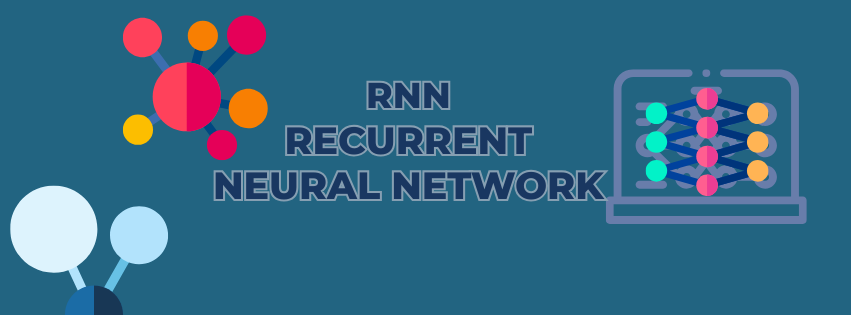

**📢 Note:** Whole Work has been done in Google Colab...

**🤔 What is RNN?**

RNN is a special neural network for **sequences**. It remembers information through loops, processing sequences of different lengths. It uses past info to influence what happens next.

**RNN's Forgetful Memory Lane 🤔**

Imagine **RNNs as the forgetful professor** of neural networks! Like a professor who sometimes **forgets the context from the beginning of a lecture while reaching the end**, RNNs tend to struggle with remembering long-term dependencies in data due to **vanishing gradients**.

**Vanishing Gradients 😵**

The vanishing gradient problem in Recurrent Neural Networks (RNNs) arises due to **diminishing gradients during backpropagation through time**. In **Recurrent Neural Networks (RNNs)**, when learning from **lots of steps in a sequence**, sometimes the **updates/gradients** become too **tiny** as they travel **backward**. This makes it hard for the network to remember or learn from earlier parts of the sequence.

**😉 Alternative Variants: LSTM, GRU**

**⚙️ How does it work?**

RNNs process data step by step. Each step uses the **current input and remembers previous steps**. This helps RNNs understand **sequences and patterns in data**.

**🎯 Purpose of RNN?**

RNNs are great for tasks **needing sequence understanding**, **like language modeling, speech recognition, predicting time series, and recognizing handwriting**. They're best at tasks needing **context from past data**.


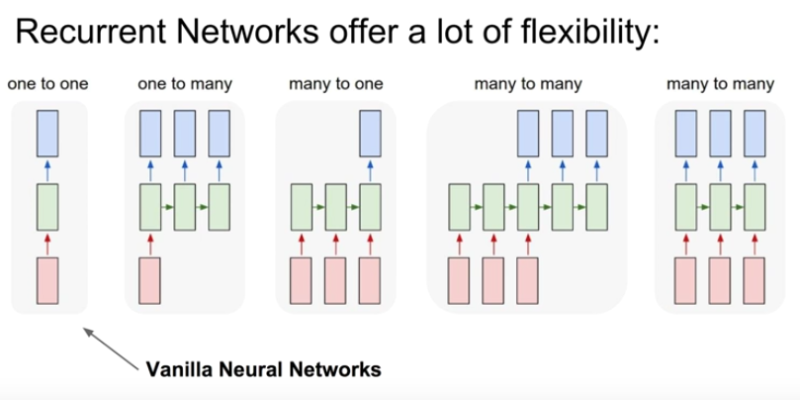

# ❄️ One to One:
In RNN's "one-to-one" architecture, **each input corresponds to exactly one output**, commonly used for processing **single data points** or short sequences. An example in real life might include **sentiment analysis of individual sentences** or **predicting the next word in a sentence based on the previous word**.

### 👊 Import Libraries

In [ ]:
import tensorflow as tf
#class allows the creation of a linear stack of neural network layers
from tensorflow.keras.models import Sequential
# fully connected layer and Simple RNN layer
from tensorflow.keras.layers import Dense, SimpleRNN

# ➿ Prepare Model

In [ ]:
#input and target data (one to one)
input_data = tf.constant([[1.0, 2.0, 3.0, 4.0]], dtype = tf.float32)
target_data = tf.constant([[6.0, 7.0, 8.0, 9.0]], dtype = tf.float32)

#model stacking
model = Sequential([SimpleRNN(units = 8, input_shape = (None, 1), activation = "relu"),
                    Dense(4)])

**📌 note:** Constants in machine learning frameworks like TensorFlow and PyTorch use float32 instead of int because float32 supports decimal values, essential for neural network computations. TensorFlow's float32 and PyTorch's float32 are conceptually the same datatype, both representing a 32-bit floating-point number. However, their internal implementations might differ slightly due to framework-specific optimizations.

As for the specific code snippet you provided, it initializes constant tensors (input_data and target_data) using float32 to handle decimal values required for neural network computations, ensuring precision during training or calculations.

* units: it is similar to nodes in CNN

* input_shape = (None, 1): for row shape data

example: `[[1.0], [2.0], [3.0], [4.0]]`

* input_shape = (1, None): for column shape data

example: `[[1.0, 2.0, 3.0, 4.0]]`

* activation function:  for contineous variable, we use relu. It also helps us to overcome vanishing gradient problem.

In [ ]:
model.compile(optimizer = "adam", loss = "mse")

In [ ]:
model.summary()

**📌 note:** input shape of RNN is (None,8) directly passing to Dense shape(None,4). Data passes directly (one to one).

In [ ]:
#model fitting
model.fit(input_data, target_data, epochs = 10, verbose = 1) # verbose = 0; while long epochs and don't want to display it
#model prediction using input data
model_predicts = model.predict(input_data)
print(f"model prediction using input data:\n{model_predicts }")
print(f"actual input data:\n{input_data}")

# 😎 LSTM (Long Short Term Memory)

LSTM is a type of recurrent neural network (RNN) ; a smart neural network that's good at remembering and understanding data sequences, like texts, music, or videos by utilizing specialized memory cells and gating mechanisms.

LSTM had an extraordinary ability: it could **remember things for a very long time** and worked sequentially. Input Sequence: A horizontal line representing the input sequence of events or data. LSTM has a magical function/notebook called **CELL STATE (LSTM Memory)** and stores **key details** of each movie. This **notebook** had special gates to **write, erase, and reveal secrets**. LSTM didn't just remember everything blindly. It had three guardians: the **'Forget Gate,' the 'Input Gate,' and the 'Output Gate.'**
**Forget Gate** has dropped irrelevant information and kept relevant information. **Input Gate** always searching for hidden information and fresh perspectives and working as a twist and turn of an event. as well as adding new information in a memory. Finally, the **Output Gate** revealed LSTM's insightful critique, predicting the movie's success or failure.

# 🍀 One to Many

One-to-many in neural networks involves a **single input generating multiple outputs**. LSTMs are preferred over RNNs for one-to-many tasks due to their ability to **handle longer sequences** and capture richer context, vital for tasks like **image captioning** or **music generation** where a single input generates multiple sequential outputs.

### 👊 Import Libraries

In [ ]:
import tensorflow as tf
#class allows the creation of a linear stack of neural network layers
from tensorflow.keras.models import Sequential
# fully connected layer and Simple RNN layer
from tensorflow.keras.layers import Dense, SimpleRNN
# import repeat vector as outputs are repeated for an input
from tensorflow.keras.layers import RepeatVector, LSTM


##### 💣 model setup:
 This setup is used when you have one input and want to generate multiple outputs in sequence, like predicting multiple future values in a time series based on a single initial data point. The RepeatVector duplicates the initial prediction to create a sequence, and the LSTM processes this sequence to make further predictions at each step.

In [ ]:
#input and target data (one to many)
input_data = tf.constant([[4.0]], dtype = tf.float32)
target_data = tf.constant([[6.0, 7.0, 8.0, 9.0]], dtype = tf.float32)

#model stacking
model = Sequential([SimpleRNN(units = 8, input_shape = (None, 1), activation = "relu"),
                    RepeatVector(4),
                    LSTM(units= 8, return_sequences=True),
                    Dense(units = 1)])
#model compile
model.compile(optimizer = "adam", loss = "mse")

#model summary
model.summary()

#model fitting
model.fit(input_data, target_data, epochs = 10, verbose = 0) # verbose = 0; while long epochs and don't want to display it, and verbose = 1 for display the process

#model prediction using input data
model_predicts = model.predict(input_data)
print(f"Model prediction using input data:\n{model_predicts }")
print(f"Actual target data:\n{target_data}")


### 🐰 Code Snippets:

* RepeatVector is 4 as the Target_Data is 4.
* LSTM units can be chosen any values.
* Here, output is 4 but input should pass through a single unit to get final result in output. That'swhy we choose Dense unit is 1.

**return_sequences=True** is set in a recurrent layer like LSTM or GRU, **this allows passing the entire sequence of outputs to the next layer**.

**When return_sequences=False:** It outputs only the final output or state of the recurrent layer, often used when the subsequent layers require a single output, like in sequence-to-vector tasks such as **sentiment analysis**.

**When return_sequences=True:** It retains and passes the sequence of outputs to the next layer, commonly used in **sequence-to-sequence tasks like machine translation** or when stacking multiple recurrent layers where each layer needs the entire sequence of outputs from the previous layer.

The usage of **return_sequences=True is akin to caching information**, but it doesn't specifically speed up training; rather, it **retains the sequence information** for further processing by subsequent layers.

### 😀 Model Summary:

Explanation:


* Input Layer/SimpleRNN: (None, 8), 8 units of input in SimpleRNN
* RepeatVector Usage: (None, 4, 8), info of 8 units of SimpleRNN passes through RepeatVector. RepeatVector has 4 units
* LSTM layer, allowing the LSTM to work with sequences.
* LSTM Layer:  (None, 4, 8), information of 4 units of RepeatVector passes through LSTM and LSTM has 8 units.
* Dense Layer: (None, 4, 1), information of 8 units LSTM passes through Dense layer and Dense layer has 1 unit.








# 🍀 Many to One

Many-to-One in RNN: It refers to situations where the model takes in multiple inputs (a sequence) and produces a single output or prediction based on the entire sequence.

**Real-Life Example:**
Sentiment Analysis of Texts: Analyzing sentiments of entire paragraphs or articles where the RNN processes a sequence of words (many inputs) and predicts a single sentiment label (one output) for the entire text. For instance, determining whether a movie review is positive or negative based on the entire review's sentiment.

### 👊 Import Libraries

In [ ]:
import tensorflow as tf
#class allows the creation of a linear stack of neural network layers
from tensorflow.keras.models import Sequential
# fully connected layer and Simple RNN layer
from tensorflow.keras.layers import Dense, SimpleRNN
# import repeat vector as outputs are repeated for an input
from tensorflow.keras.layers import RepeatVector, LSTM


In [ ]:
#input and target data (one to many)
input_data = tf.constant([[1.0, 2.0, 3.0, 4.0]], dtype = tf.float32)
target_data = tf.constant([[6.0]], dtype = tf.float32)

#model stacking
model = Sequential([SimpleRNN(units = 8, input_shape = (None, 1), activation = "relu"),
                    RepeatVector(1),
                    LSTM(units= 8, return_sequences=True),
                    Dense(units = 1)])


**📌 note:** The overall configuration appears to be intended for a task where a single input is used to generate multiple sequential outputs. The SimpleRNN generates a single output, which is then replicated by RepeatVector to create a sequence. The LSTM, set to process sequences, takes these replicated outputs as input and produces a sequence of outputs. Finally, the Dense layer predicts values for each step in the output sequence.

In [ ]:
#model compile
model.compile(optimizer = "adam", loss = "mse")

#model summary
model.summary()

#model fitting
model.fit(input_data, target_data, epochs = 10, verbose = 0) # verbose = 0; while long epochs and don't want to display it, and verbose = 1 for display the process

#model prediction using input data
model_predicts = model.predict(input_data)
print(f"Model prediction using input data:\n{model_predicts }")
print(f"Actual target data:\n{target_data}")


# 🍀 Many to Many

It refers to situations where the model takes multiple inputs and produces multiple outputs, often used in sequence-to-sequence tasks.

Language Translation: Translating sentences from one language to another, where each word or token in the input sequence corresponds to a translated word or token in the output sequence.



### 👊 Import Libraries

In [ ]:
import tensorflow as tf
#class allows the creation of a linear stack of neural network layers
from tensorflow.keras.models import Sequential
# fully connected layer and Simple RNN layer
from tensorflow.keras.layers import Dense, SimpleRNN
# import repeat vector as outputs are repeated for an input
from tensorflow.keras.layers import TimeDistributed


In [ ]:
#input and target data (one to many)
input_data = tf.constant([[[1.0], [2.0], [3.0], [4.0]]], dtype = tf.float32)
target_data = tf.constant([[[6.0], [7.0], [8.0], [9.0]]], dtype = tf.float32)

#model stacking
model = Sequential([SimpleRNN(units = 8, input_shape = (None, 1), activation = "relu", return_sequences= True),
                   TimeDistributed(Dense(units = 1)) #introduce time distribution for each input against one dense
                    ])


**📌 note:** 😤 This model sets up a neural network to handle sequences (many inputs to many outputs). The SimpleRNN layer processes sequences step by step and produces outputs at each step. TimeDistributed helps apply the same Dense layer separately to each step's output for predictions at every sequence step.

**Clear Understanding:** It's like a baking class where each step of the recipe (mix, bake, decorate) gets its own teacher (TimeDistributed), but all students (sequence steps) follow the same instructions (Dense) for each step.😆

In [ ]:
#model compile
model.compile(optimizer = "adam", loss = "mse")

#model summary
model.summary()

#model fitting
model.fit(input_data, target_data, epochs = 10, verbose = 0) # verbose = 0; while long epochs and don't want to display it, and verbose = 1 for display the process

#model prediction using input data
model_predicts = model.predict(input_data)
print(f"Model prediction using input data:\n{model_predicts }")
print(f"Actual target data:\n{target_data}")